In [1]:
import pandas as pd
import numpy as np
import statistics

In [2]:
import import_ipynb
from functions import df_to_dict, df_act_to_dict, calc_percentage_2, calc_values, calc_bayes, visualize_prediction

importing Jupyter notebook from functions.ipynb


In [3]:
lead_actor_oscars = pd.read_csv('../Best Leading Actor/oscar.csv', encoding='utf-8-sig')
lead_actor_bafta = pd.read_csv('../Best Leading Actor/bafta.csv', encoding='utf-8-sig')
lead_actor_critics = pd.read_csv('../Best Leading Actor/critics.csv', encoding='utf-8-sig')
lead_actor_sag = pd.read_csv('../Best Leading Actor/sag.csv', encoding='utf-8-sig')
lead_actor_globes = pd.read_csv('../Best Leading Actor/globes.csv', encoding='utf-8-sig')

In [4]:
lead_actor_oscars

,Year,Actor,Film
0,2010,Colin Firth,The King's Speech
1,2010,Javier Bardem,Biutiful
2,2010,Jeff Bridges,True Grit
3,2010,Jesse Eisenberg,The Social Network
4,2010,James Franco,127 Hours
5,2011,Jean Dujardin,The Artist
6,2011,Demián Bichir,A Better Life
7,2011,George Clooney,The Descendants
8,2011,Gary Oldman,Tinker Tailor Soldier Spy
9,2011,Brad Pitt,Moneyball


In [5]:
lead_actor_oscars_dict = df_act_to_dict(lead_actor_oscars)
lead_actor_bafta_dict = df_act_to_dict(lead_actor_bafta)
lead_actor_critics_dict = df_act_to_dict(lead_actor_critics)
lead_actor_sag_dict = df_act_to_dict(lead_actor_sag)
lead_actor_globes_dict = df_act_to_dict(lead_actor_globes)

In [6]:
lead_actor_awards = [lead_actor_bafta_dict, 
                  lead_actor_critics_dict, 
                  lead_actor_sag_dict, 
                  lead_actor_globes_dict]

lead_actor_union_all = []

for year in range(2010, 2020):
    union_all_each = lead_actor_oscars_dict[year].union(lead_actor_bafta_dict[year], 
                                                     lead_actor_critics_dict[year], 
                                                     lead_actor_sag_dict[year], 
                                                     lead_actor_globes_dict[year])    
    lead_actor_union_all.append(union_all_each)    

lead_actor_union_all

[{('Colin Firth', "The King's Speech"),
  ('Jake Gyllenhaal', 'Love & Other Drugs'),
  ('James Franco', '127 Hours'),
  ('Javier Bardem', 'Biutiful'),
  ('Jeff Bridges', 'True Grit'),
  ('Jesse Eisenberg', 'The Social Network'),
  ('Johnny Depp', 'Alice in Wonderland'),
  ('Johnny Depp', 'The Tourist'),
  ('Kevin Spacey', 'Casino Jack'),
  ('Mark Wahlberg', 'The Fighter'),
  ('Paul Giamatti', "Barney's Version"),
  ('Robert Duvall', 'Get Low'),
  ('Ryan Gosling', 'Blue Valentine')},
 {('Brad Pitt', 'Moneyball'),
  ('Brendan Gleeson', 'The Guard'),
  ('Demián Bichir', 'A Better Life'),
  ('Gary Oldman', 'Tinker Tailor Soldier Spy'),
  ('George Clooney', 'The Descendants'),
  ('Jean Dujardin', 'The Artist'),
  ('Joseph Gordon-Levitt', '50/50'),
  ('Leonardo DiCaprio', 'J. Edgar'),
  ('Michael Fassbender', 'Shame'),
  ('Owen Wilson', 'Midnight in Paris'),
  ('Ryan Gosling', 'Crazy, Stupid, Love.'),
  ('Ryan Gosling', 'Drive'),
  ('Ryan Gosling', 'The Ides of March')},
 {('Ben Affleck', 'A

In [7]:
lead_actor_if, lead_actor_mean = calc_values(lead_actor_oscars_dict, lead_actor_awards, lead_actor_union_all)

# for year in range(2010, 2020):
#     print(len(lead_actor_union_all[year-2010]))
    

lead_actor_if
lead_actor_mean

[[0.8200000000000001, 0.8200000000000001, 0.13452380952380952],
 [0.6523809523809524, 0.8200000000000001, 0.31845238095238093],
 [0.78, 0.78, 0.1636904761904762],
 [0.45, 0.9, 0.8017857142857143]]

In [8]:
lead_actor_2020_bafta = pd.read_csv('../Best Leading Actor/Applied Data/bafta.csv', encoding='utf-8-sig')
lead_actor_2020_critics = pd.read_csv('../Best Leading Actor/Applied Data/critics.csv', encoding='utf-8-sig')
lead_actor_2020_sag = pd.read_csv('../Best Leading Actor/Applied Data/sag.csv', encoding='utf-8-sig')
lead_actor_2020_globes = pd.read_csv('../Best Leading Actor/Applied Data/globes.csv', encoding='utf-8-sig')

In [9]:
lead_actor_2020_bafta_dict = df_act_to_dict(lead_actor_2020_bafta)[2020]
lead_actor_2020_critics_dict = df_act_to_dict(lead_actor_2020_critics)[2020]
lead_actor_2020_sag_dict = df_act_to_dict(lead_actor_2020_sag)[2020]
lead_actor_2020_globes_dict = df_act_to_dict(lead_actor_2020_globes)[2020]

In [10]:
lead_actor_2020_union_all = lead_actor_2020_bafta_dict.union(lead_actor_2020_critics_dict, 
                                                       lead_actor_2020_sag_dict,
                                                       lead_actor_2020_globes_dict)

lead_actor_2020_union_all = list(lead_actor_2020_union_all)

lead_actor_2020_awards = [lead_actor_2020_bafta_dict,
                       lead_actor_2020_critics_dict,
                       lead_actor_2020_sag_dict,
                       lead_actor_2020_globes_dict]


lead_actor_2020_union_all

[('James Corden', 'The Prom'),
 ('Ben Affleck', 'The Way Back'),
 ('Riz Ahmed', 'Sound of Metal'),
 ('Adarsh Gourav', 'The White Tiger'),
 ('Tahar Rahim', 'The Mauritanian'),
 ('Delroy Lindo', 'Da 5 Bloods'),
 ('Anthony Hopkins', 'The Father'),
 ('Steven Yeun', 'Minari'),
 ('Dev Patel', 'The Personal History of David Copperfield'),
 ('Sacha Baron Cohen', 'Borat Subsequent Moviefilm'),
 ('Lin-Manuel Miranda', 'Hamilton'),
 ('Andy Samberg', 'Palm Springs'),
 ('Gary Oldman', 'Mank'),
 ('Mads Mikkelsen', 'Another Round'),
 ('Chadwick Boseman', "Ma Rainey's Black Bottom"),
 ('Tom Hanks', 'News of the World')]

In [11]:
lead_actor_final, lead_actor_prob_final = calc_bayes(lead_actor_2020_awards, lead_actor_2020_union_all, lead_actor_mean)

In [14]:
lead_actor_final_join = list(map(lambda name: " - ".join(name), lead_actor_final))
lead_actor_final_join[-1] = "Others"
lead_actor_final_join

['Riz Ahmed - Sound of Metal',
 "Chadwick Boseman - Ma Rainey's Black Bottom",
 'Anthony Hopkins - The Father',
 'Gary Oldman - Mank',
 'Steven Yeun - Minari',
 'Tahar Rahim - The Mauritanian',
 'Mads Mikkelsen - Another Round',
 'Adarsh Gourav - The White Tiger',
 'Tom Hanks - News of the World',
 'Delroy Lindo - Da 5 Bloods',
 'Ben Affleck - The Way Back',
 'Sacha Baron Cohen - Borat Subsequent Moviefilm',
 'Lin-Manuel Miranda - Hamilton',
 'James Corden - The Prom',
 'Dev Patel - The Personal History of David Copperfield',
 'Andy Samberg - Palm Springs',
 'Others']

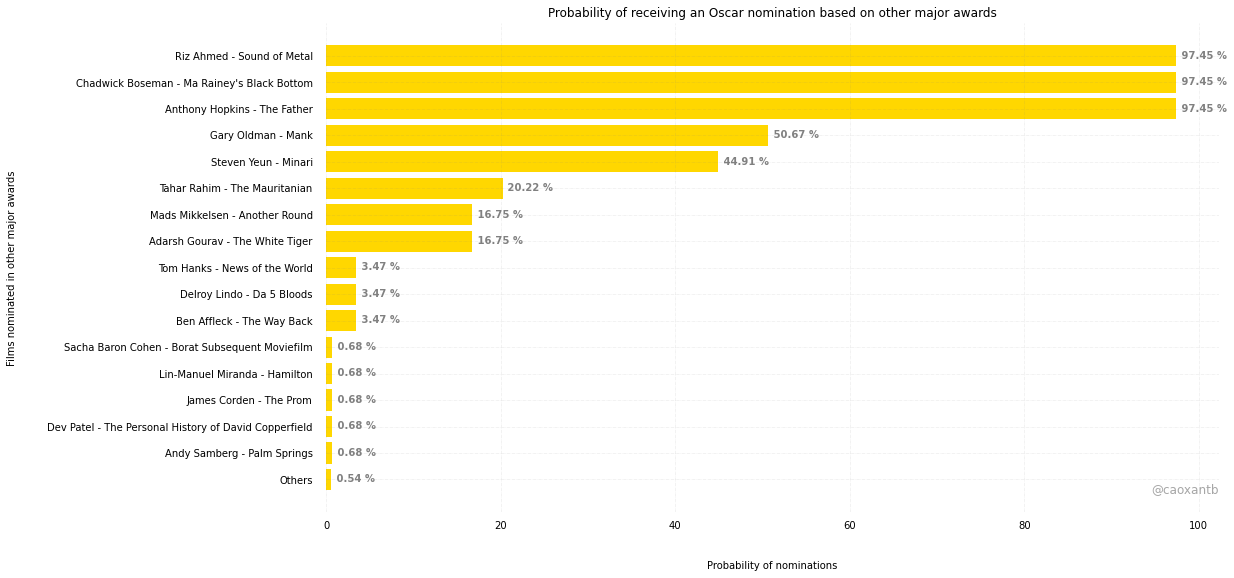

In [13]:
visualize_prediction(lead_actor_final_join, lead_actor_prob_final)